# Assignment #01

# **Question 1: Image Convolution and Gaussian Filter**

## Importing Necessary Libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from scipy.ndimage import gaussian_filter

###1a. Grayscale Image Convolution with 2D Filter (2 Points)

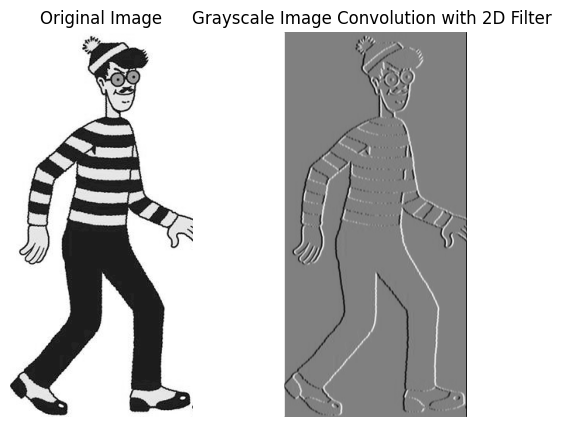

In [2]:
def convolve2d(image, kernel):
    """
    Perform a 2D convolution of a grayscale image with a given kernel.
    Args:
    - image: 2D numpy array representing the grayscale image`
    - kernel: 2D numpy array representing the filter/kernel

    Returns:
    - convolved_image: 2D numpy array of the same size as the input image
    """

    # get the padding required for the convolution
    # if kernel is odd, pad by (k-1)/2
    # if kernel is even, pad by k/2
    # either way, the pad is the floor of the division
    kernel_height, kernel_width = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # convert the image and kernel to float to avoid truncation
    image = np.array(image, dtype=np.float32)
    kernel = np.array(kernel, dtype=np.float32)

    # Pad the image with 0
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

    # Initialize the convolved image and set the type to float,to avoid truncation
    convolved_image = np.zeros_like(image, dtype=np.float32)

    # Iterate over each pixel in the image
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Extract the region that we are going to convolve
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            # Perform the convolution operation (element-wise multiplication and sum)
            convolved_image[i, j] = np.sum(region * kernel)

    return convolved_image


# Sobel vertical
kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])


# Read the image in grayscale
image = cv2.imread("template.png", cv2.IMREAD_GRAYSCALE)


# Apply the convolution
resulting_image = convolve2d(image, kernel)

plt.figure(figsize=(10, 5))

# Display original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Display Grayscale Image Convolution with 2D Filter
plt.subplot(1, 3, 2)
plt.imshow(resulting_image, cmap='gray')
plt.title("Grayscale Image Convolution with 2D Filter ")
plt.axis("off")

plt.show()

### 1b. RGB Image Convolution with 3D Filter (1 Point)

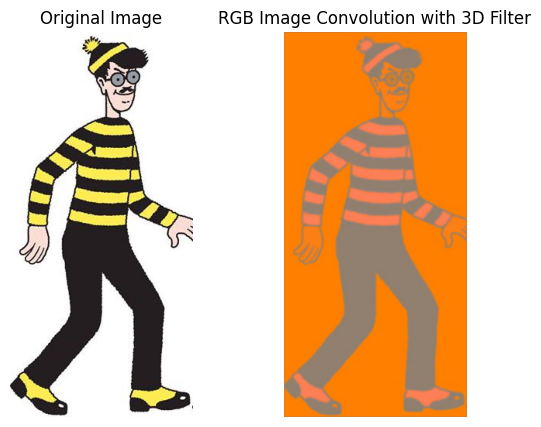

In [3]:
def convolve_rgb(image, kernel):
    """
    Perform a convolution on an RGB image using a 3D filter.
    Args:
    - image: 3D numpy array representing the RGB image
    - kernel: 3D numpy array (filter) with a depth of 3 (RGB)

    Returns:
    - convolved_image: 3D numpy array of the same size as the input image
    """
    # calculate the padding size
    kernel_height, kernel_width, kernel_depth = kernel.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    # convert the image and kernel to float to avoid truncation
    image = np.array(image, dtype=np.float32)
    kernel = np.array(kernel, dtype=np.float32)

    # pad the image with 0
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width), (0, 0)), mode='constant')

    # Initialize the convolved image and set the type to uint8
    convolved_image = np.zeros_like(image, dtype=np.float32)
    # Iterate over each channel of each pixel in the image
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            for k in range(image.shape[2]):
                # Extract the region that we are going to convolve
                region = padded_image[i:i + kernel_height, j:j + kernel_width, k]
                # Perform the convolution operation on each channel
                convolved_image[i, j, k] = np.sum(region * kernel[:, :, k])

    # Normalize the image and convert back to uint8
    convolved_image = cv2.normalize(convolved_image, None, 0, 255, cv2.NORM_MINMAX)
    convolved_image = convolved_image.astype(np.uint8)

    return convolved_image


# Read the image in color
image = cv2.imread("template.png", cv2.IMREAD_COLOR)

kernel = np.array([
    [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]],
    [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]],
    [[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]
])

convolved_rgb_image = convolve_rgb(image, kernel)

plt.figure(figsize=(10, 5))

# Display original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Display RGB Image Convolution with 3D Filter
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(convolved_rgb_image, cv2.COLOR_BGR2RGB))
plt.title("RGB Image Convolution with 3D Filter")
plt.axis("off")

plt.show()

### Convolve the attached waldo.png with a (2D) Gaussian filter with σ = 1 and visualize the result (display the result of the convolution). You can use built-in functions for convolution. (1 Point)

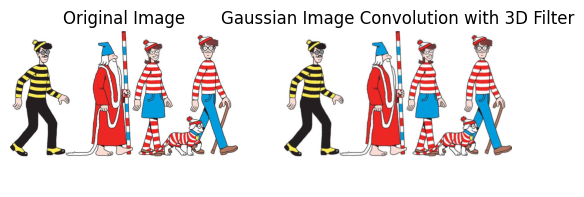

In [4]:
# Code for (2D) Gaussian filter with σ = 1 will go here
# image sharpening

image = cv2.imread("waldo.png", cv2.IMREAD_COLOR)

resulting_image = cv2.GaussianBlur(image, (3, 3) , 1.0)

plt.figure(figsize=(10, 5))

# Display original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Display RGB Image Convolution with 3D Filter
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(resulting_image, cv2.COLOR_BGR2RGB))
plt.title("Gaussian Image Convolution with 3D Filter")
plt.axis("off")

plt.show()


##-----------------------------------------------************************----------------------------------------------------

## Question 2: Implement Canny Edge Detection from Scratch







## 2a. Compute Gradient Magnitude for Images. Compute magnitude of gradients for the attached images waldo.png and template.png. (1 Point)

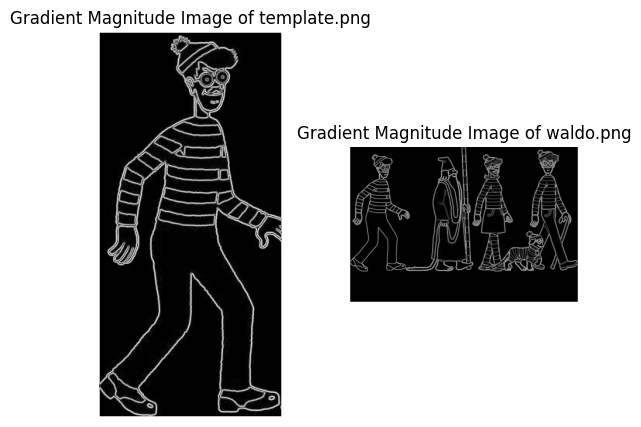

In [5]:
def compute_gradient_magnitude(image):
    """
    Compute the magnitude of gradients for an image.
    Args:
    - image: Grayscale image (2D numpy array)

    Returns:
    - gradient_magnitude: 2D numpy array representing gradient magnitudes
    """
    # Sobel horizontal filter
    Sobel_horizontal = np.array([
        [-1, -2, -1],
        [0, 0, 0],
        [1, 2, 1]
    ])

    # Sobel vertical filter
    Sobel_vertical = np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])

    # Compute the horizontal and vertical gradients
    gradient_x = convolve2d(image, Sobel_horizontal)
    gradient_y = convolve2d(image, Sobel_vertical)

    # Compute the gradient magnitude
    gradient_magnitude = np.zeros_like(image, np.float32)
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX)

    return gradient_magnitude.astype(np.uint8)


template_image = cv2.imread("template.png", cv2.IMREAD_GRAYSCALE)
template_gradient_magnitude = compute_gradient_magnitude(template_image)


waldo_image = cv2.imread("waldo.png", cv2.IMREAD_GRAYSCALE)
waldo_gradient_magnitude = compute_gradient_magnitude(waldo_image)

plt.figure(figsize=(10, 5))

# Display original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(template_gradient_magnitude, cv2.COLOR_BGR2RGB))
plt.title("Gradient Magnitude Image of template.png")
plt.axis("off")

# Display RGB Image Convolution with 3D Filter
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(waldo_gradient_magnitude, cv2.COLOR_BGR2RGB))
plt.title("Gradient Magnitude Image of waldo.png")
plt.axis("off")

plt.show()


## 2b. MyCannyEdgeDetector Function (3 Point)

### Key Stages of Canny Edge Detection (Explanation)

Explain the key stages of the Canny edge detection algorithm in detail. Your explanation should cover:

1. **Noise Reduction**
2. **Gradient Calculation**
3. **Non-Maximum Suppression**
5. **Edge Tracking by Hysteresis**

Write your response in the markdown cell below.

### Load the image

In [6]:
image_path = 'template.png'  # Replace with your image path

image = cv2.imread(image_path)

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Convert to grayscale

#### Noise Reduction (Gaussian Blur)

Explanation:

To process edge detection, the image has to be clear because noise can lead to false edge detection. Thus the first step is to remove the noise out of the image. By applying the Gaussian kernel, the high-frequency noise can be removed while preserving the edges.

The implementation of `apply_gaussian_blur` is to use built-in function `GaussianBlur` with assigned kernel size and sigma.

In [7]:
def apply_gaussian_blur(img, kernel_size=5, sigma=1.0):
    """Apply Gaussian blur to reduce noise."""
    smoothed_image = cv2.GaussianBlur(img, (kernel_size, kernel_size), sigma)
    return smoothed_image

#### Gradient Calculation (using Sobel filters)

Explanation:

- Gradient calculation is aimed for calculating the changes in pixel intensity of the image both horizontally and vertically. These intensity changes help identify where edges are located, as sharp transitions in pixel values typically indicate edges.
    
    By applying the Sobel filters, we can get the gradients in both direction are computed separately. We then combine the gradients to determine the magnitude and angle of the gradients which is used in subsequent steps to distinguish edges more accurately.

- The function `calculate_gradients` utilizes the built-in `cv2.Sobel` to apply Sobel filters. The magnitude is the the square root of the sum of the squares of the values in the x and y directions, and the gradient angle is determined using arctangent of the ratio between the y and x gradients.

In [8]:
def calculate_gradients(img):
    """Calculate gradients using Sobel filters."""
    # Code for Gradient Calculation will go here
    # apply sobel filters
    gradient_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

    # calculate gradient magnitude
    gradient_magnitude = np.zeros_like(image, np.float32)
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX)

    # calculate gradient angles
    gradient_angle = np.zeros_like(img, np.float32)
    gradient_angle = np.arctan2(gradient_y, gradient_x)
    
    return gradient_magnitude, gradient_angle

#### Function for Non-Maximum Suppression

Explanation:

- This steps is mainly for retaining the most significant edges to ensure the edges appear sharp and thin. The core idea is to only leave the pixels with local-maximum of the gradient magnitudes around its 8 neighbors.

- The function `non_maximum_suppression` iterates all the pixels in the magnitude of gradients, and only keeps the magnitudes that are local-maximum, the others are suppresed to 0.

In [9]:
def non_maximum_suppression(gradient_magnitude, gradient_angle):
    """
    Perform non-maximum suppression on the gradient magnitude.
    Args:
    - gradient_magnitude: 2D array of gradient magnitudes
    - gradient_angle: 2D array of gradient directions (angles in degrees)

    Returns:
    - suppressed_magnitude: 2D array after non-maximum suppression
    """
    # Code for non-maximum suppression
    suppressed_image = np.zeros_like(gradient_magnitude, dtype=np.float32)
    height, width = gradient_magnitude.shape

    # Convert angles to degrees
    gradient_angle = np.degrees(gradient_angle)
    # print(gradient_angle.max(), gradient_angle.min())

    # iterate over the image and compare the pixel with its neighbors
    for i in range(1, height - 1): # Skip the first and last row
        for j in range(1, width - 1):
            # Get the angle of the gradient
            angle = gradient_angle[i, j]

            # Check the angle and assign the previous and next pixels accordingly
            # horizontal edge
            if(-22.5 < angle <= 22.5) or (angle > 157.5 or angle <= -157.5):
                neighbour1 = gradient_magnitude[i, j + 1]
                neighbour2 = gradient_magnitude[i, j - 1]
            # vertical edge
            elif (67.5 < angle <= 112.5) or (-112.5 < angle <= -67.5):
                neighbour1 = gradient_magnitude[i - 1, j]
                neighbour2 = gradient_magnitude[i + 1, j]
            # diagonal edge
            elif (22.5 < angle <= 67.5) or (-157.5 < angle <= -112.5):
                neighbour1 = gradient_magnitude[i - 1, j + 1]
                neighbour2 = gradient_magnitude[i + 1, j - 1]
            else:
                neighbour1 = gradient_magnitude[i - 1, j - 1]
                neighbour2 = gradient_magnitude[i + 1, j + 1]

            # Perform non-maximum suppression
            if gradient_magnitude[i, j] >= neighbour1 and gradient_magnitude[i, j] >= neighbour2:
                suppressed_image[i, j] = gradient_magnitude[i, j]


    return suppressed_image


#### Function for Hysteresis Thresholding

Explanation:

- Hysteresis thresholding categorizes the gradient magnitudes into strong edges, weak edges, and non-edges based on predefined low and high thresholds. Gradient values below the low threshold are classified as non-edges, while values above the high threshold are marked as strong edges. For values that fall between these thresholds, they are classified as weak edges only if they are connected to strong edges. This approach helps minimize the number of isolated false edges.

- The hysteresis_thresholding function applies these thresholding rules to each pixel in the suppressed image.

In [10]:
def hysteresis_thresholding(suppressed_image, low_threshold, high_threshold):
    """
    Perform hysteresis thresholding on the non-max suppressed image.
    Args:
    - suppressed_image: 2D array after non-maximum suppression
    - low_threshold: Low threshold for hysteresis
    - high_threshold: High threshold for hysteresis

    Returns:
    - edge_image: Binary image after hysteresis thresholding
    """
    # Code for hysteresis thresholding
    edge_image = np.zeros_like(suppressed_image, np.uint8)
    height, width = suppressed_image.shape

    for i in range(height):
        for j in range(width):
            # Check if the pixel is above the high threshold
            if suppressed_image[i, j] >= high_threshold:
                edge_image[i, j] = 255
            elif suppressed_image[i, j] < low_threshold:
                edge_image[i, j] = 0
            else:
                # Check if the pixel falls between the low and high threshold
                # Check all 8 neighbours to see if it connected to a strong edge
                for x in range(-1, 2):
                    for y in range(-1, 2):
                        # skip the current pixel
                        row = i + x
                        col = j + y
                        if (x == 0 and y == 0) or row < 0 or col < 0 or row >= height or col >= width:
                            continue

                        if suppressed_image[row, col] >= high_threshold:
                            edge_image[i, j] = 255

    return edge_image


#### Main Function for Canny Edge Detection

In [11]:
def MyCannyEdgeDetector(image, low_threshold, high_threshold):
    """
    Custom implementation of the Canny Edge Detector.
    Args:
    - image: Grayscale or RGB image (as numpy array)
    - threshold: Threshold value for edge detection

    Returns:
    - edge_image: Binary edge-detected image
    """

    # Apply Gaussian filter
    smoothed_image = apply_gaussian_blur(image, sigma=1, kernel_size=3)

    # Compute gradients
    gradient_magnitude, gradient_angle = calculate_gradients(smoothed_image)

    # Perform non-maximum suppression
    suppressed_image = non_maximum_suppression(gradient_magnitude, gradient_angle)

    # Apply hysteresis thresholding
    edge_image = hysteresis_thresholding(suppressed_image, low_threshold=low_threshold, high_threshold=high_threshold)

    return edge_image


#### Apply your custom Canny function and  built-in OpenCV Canny function

*Select the low and high thresholds according to your preference*



In [12]:
# Apply your custom Canny function
custom_edges = MyCannyEdgeDetector(gray_image, low_threshold=40, high_threshold=160)

# Apply the built-in OpenCV Canny function for comparison
opencv_edges = cv2.Canny(gray_image, 40, 160, apertureSize=3)


#### Compute the Structural Similarity Index Measure (SSIM) of the edges with your defined code and inbuilt commands here (2 Point).


In [13]:

def calculate_ssim(custom_edges, opencv_edges):
    """
    Calculate the Structural Similarity Index (SSIM) between two edge-detected images.

    Args:
    - custom_edges: 2D numpy array of edges from custom Canny edge detection
    - opencv_edges: 2D numpy array of edges from OpenCV's Canny edge detection

    Returns:
    - similarity_index: SSIM between the custom and OpenCV edge-detected images
    """

    # Code for Structural Similarity Index Measure will go here
    similarity_index = ssim(custom_edges, opencv_edges)

    return similarity_index


# Calculate SSIM
ssim_value = calculate_ssim(custom_edges, opencv_edges)

# Print SSIM result
print(f"SSIM between custom Canny and OpenCV Canny: {ssim_value:.4f}")


SSIM between custom Canny and OpenCV Canny: 0.8749


### Visualize the results

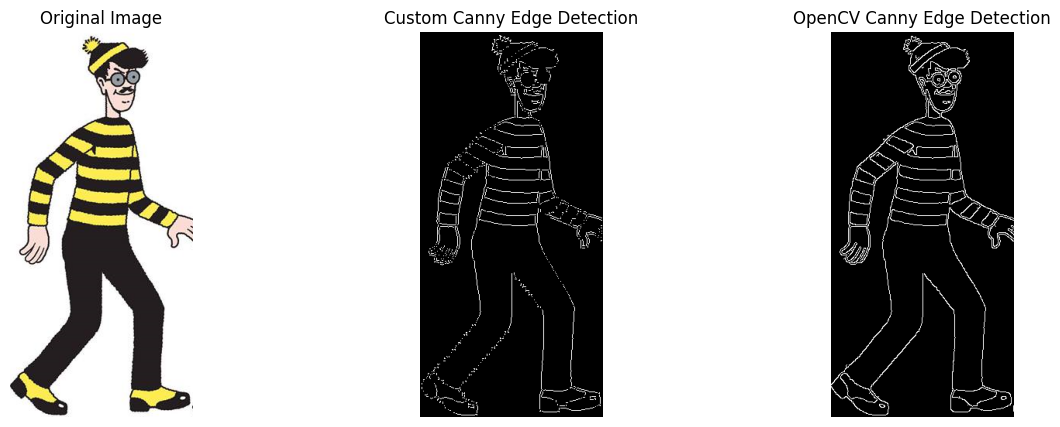

In [14]:
plt.figure(figsize=(15, 5))

# Display original image
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

# Display custom Canny edge result
plt.subplot(1, 3, 2)
plt.imshow(custom_edges, cmap='gray')
plt.title("Custom Canny Edge Detection")
plt.axis("off")

# Display OpenCV's Canny edge result
plt.subplot(1, 3, 3)
plt.imshow(opencv_edges, cmap='gray')
plt.title("OpenCV Canny Edge Detection")
plt.axis("off")

plt.show()

### Bonus Question: Limitations and Improvements

Discuss potential limitations of the Canny edge detection algorithm. Suggest how it could be improved for images with complex textures or lighting conditions.



1. Potential limitations:

    - In the first step, the gaussian filter does smooth image, in the mean time, there is potential that it erase important information during this step.

    - The values of thresholds can also be a threat to the results, for instance, if the thresholds are too high, it could lose edges, or if the thresholds are too small, it draws too many unnecessary edges. Canny edge detection doesn't provide a standard of how much details are enough.

2. Suggesttions for complex texture and lighting conditions:

    - Apply multiple Gaussian filters with different sigmas and kernel sizes to reduce the noise without oversmoothing

    - Try various values of thresholds to output a image with least noise and most important edges.
